Use the diabetes data set from UCI and Pima Indians Diabetes data set for
performing the following
:
● Univariate analysis: Frequency, Mean, Median, Mode, Varianc
e,
Standard Deviation, Skewness and Kurto
sis
● Bivariate analysis: Linear and logistic regression model
ling
● Multiple Regression ana
lysis
● Also compare the results of the above analysis for the two data sets

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
data=pd.read_csv('Diabetes.csv')

In [3]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
st.mode(data)

ModeResult(mode=array([ 1.   , 99.   , 70.   ,  0.   ,  0.   , 32.   ,  0.254, 22.   ,
        0.   ]), count=array([135.,  17.,  57., 227., 374.,  13.,   6.,  72., 500.]))

In [9]:
st.skew(data)

array([ 0.89991194,  0.17341396, -1.84000523,  0.10915876,  2.26781046,
       -0.42814328,  1.9161592 ,  1.12738926,  0.6337757 ])

In [10]:
st.kurtosis(data)

array([ 0.15038274,  0.62881333,  5.13869066, -0.52449449,  7.15957492,
        3.26125742,  5.55079205,  0.63117694, -1.59832836])

In [11]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
lr=LinearRegression()

In [16]:
temp=lr.fit(x_train,y_train)

In [19]:
lr.score(x_test,y_test)

0.2698891280578315

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
lor=LogisticRegression()

In [24]:
temp=lor.fit(x_train,y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
lor.score(x_test,y_test)

0.8181818181818182

In [26]:
from sklearn.metrics import classification_report

In [27]:
preds=lor.predict(x_test)

In [28]:
classification_report(y_test,preds)

'              precision    recall  f1-score   support\n\n           0       0.88      0.87      0.88       169\n           1       0.66      0.68      0.67        62\n\n    accuracy                           0.82       231\n   macro avg       0.77      0.77      0.77       231\nweighted avg       0.82      0.82      0.82       231\n'

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

AttributeError: 'Series' object has no attribute 'value_couunts'

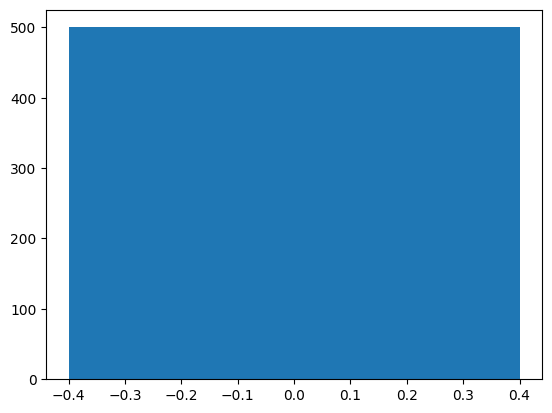

In [31]:
plt.bar(0,y.value_counts()[0],label='NO')
plt.bar(1,y.value_couunts()[1],label='YES')